In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.read_csv('smoker-data.csv')

df.head()

,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked,Location 1
0,1996.0,Puerto Rico,9.4,5.1,16.0,69.5,Puerto Rico
1,2005.0,Virgin Islands,5.3,2.8,12.8,79.1,Virgin Islands
2,2005.0,Puerto Rico,7.9,5.2,16.9,70.0,Puerto Rico
3,2002.0,Virgin Islands,7.0,2.4,12.1,78.5,Virgin Islands
4,2003.0,Guam,26.3,7.8,14.3,51.7,NaN


In [3]:
df.fillna(method ='ffill', inplace = True) 
never = df['Never smoked']
former = df['Former smoker']

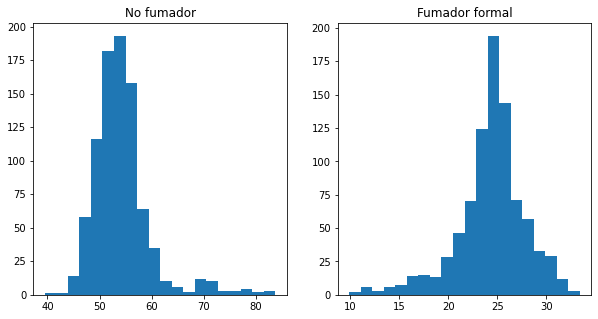

In [4]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(x=never, bins = 20)
plt.title('No fumador')

plt.subplot(1,2,2)
plt.hist(x = former, bins = 20)
plt.title('Fumador formal')

plt.show()

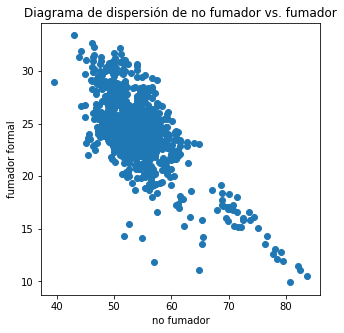

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(x = never, y = former)
plt.xlabel("no fumador")
plt.ylabel("fumador formal")
plt.title("Diagrama de dispersión de no fumador vs. fumador")

plt.show()

**¿Cómo son cada una de las distribuciones (simétrica, asimétrica, sesgada a la izquierda, segada a la derecha)?**

El histograma de los "No fumadores" presenta una distribución de los datos asimétrica con un poco de sesgo a la derecha.
El histograma de los "Fumadores formales" presenta, al igual que el histograma pasado, falta de simetría. En este caso esta segunda variable tiene sesgo a la izquierda.

**Al visualizar los histogramas ¿existen valores atípicos?** 

El histograma referente a los "No Fumadores" muestra datos atípicos en sus extremos mayores (datos atípicos a partir del eje X = 70~). Estos están separados de la media y probablemente son responsables de la carencia de simetría en el histograma. 
Para el histograma de "Fumador formal" se observan de igual manera datos alejados de la media en el extremo izquierdo. Los datos atípicos se pueden categorizar aproximadamente donde X = 17.

**¿Cómo es el comportamiento de los no fumadores con respecto a los fuamdores formales?** 

Al observar el gráfico de dispersión se puede identificar a primera vista una correlación negativa con un cierto nivel de fuerza entre las variables. Para ser más específico, la correlación entre estas variables es de -0.704 (Dato obtenido directamente de la función de Excel =CORREL)
En cuanto al ruido de la dispersión, se encuentran ciertos valores aberrantes para 10~<Y<17~ Este rango se aleja de la pendiente y de los demás datos. 

## ¿En qué año hubo menos fumadores en California y en qué año hubo más fumadores formales en California?

In [6]:
just_cali = ((df['State']=='California'))
california = df[just_cali]
california


,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked,Location 1
70,1996.0,California,13.0,5.6,25.0,56.4,"California\n(37.638300000444815, -120.99958999..."
148,2008.0,California,8.9,5.1,23.3,62.7,"California\n(37.638300000444815, -120.99958999..."
150,1997.0,California,12.6,5.9,26.9,54.6,"California\n(37.638300000444815, -120.99958999..."
205,2010.0,California,7.5,4.6,23.1,64.8,"California\n(37.638300000444815, -120.99958999..."
320,2009.0,California,8.1,4.7,23.2,63.9,"California\n(37.638300000444815, -120.99958999..."
459,1999.0,California,12.5,6.2,26.4,54.9,"California\n(37.638300000444815, -120.99958999..."
460,2003.0,California,11.3,5.5,25.2,58.0,"California\n(37.638300000444815, -120.99958999..."
504,2005.0,California,9.8,5.3,23.3,61.5,"California\n(37.638300000444815, -120.99958999..."
525,2000.0,California,12.1,5.1,26.0,56.7,"California\n(37.638300000444815, -120.99958999..."
545,1995.0,California,12.7,2.5,28.2,56.7,"California\n(37.638300000444815, -120.99958999..."


In [7]:
years_cali = california['Year']
x = years_cali.sort_values(ascending = True)

never_cali = california['Never smoked']
former_cali = california['Former smoker']

Text(0.5, 1.0, 'No fumadores de California a lo largo de los años')

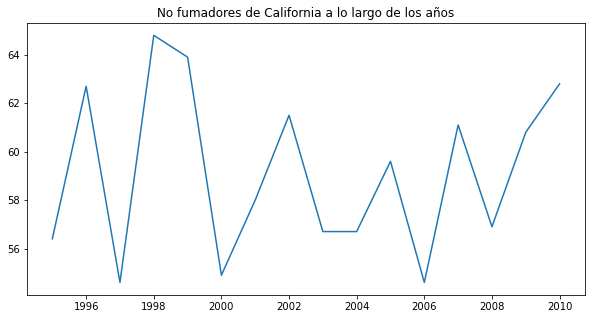

In [8]:
plt.figure(figsize=(10,5))

plt.subplot(1,1,1)
y = never_cali
plt.plot(x,y)
plt.title("No fumadores de California a lo largo de los años")

Text(0.5, 1.0, 'Fumadores de California a lo largo de los años')

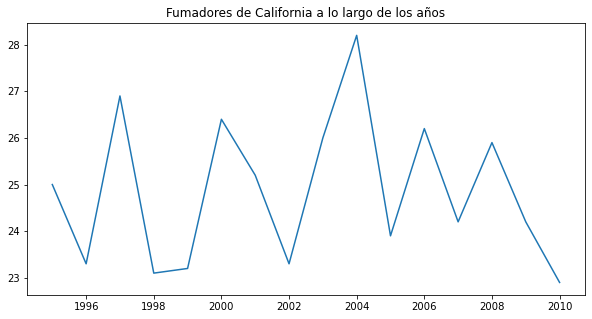

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
s = former_cali
plt.plot(x,s)
plt.title("Fumadores de California a lo largo de los años")

Habiendo aislado únicamente a California de la base de datos, se han ordenado los años de manera creciente y se han generado dos variables: una para los no fumadores y otra para los fumadores formales. Con esto se realizan dos gráficas: Una de los no fumadores en california a lo largo de los años. La segunda muestra los fumadores formales de California a lo largo de los años.

Con estas gráficas generadas se puede observar que en California hubo más personas "No fumadoras" en el año 1998. En el año 2004 se registró el mayor número de "Fumadores" en California.

Los **grupos de interés** a los cuales les podría interesar estos datos serían el gobierno en el sector de salud pública así como hospitales privados


**Conclusión

A manera de conclusión fue de gran importancia haber seleccionado primeramente las librerias adecuadas. Así mismo una tarea importante fue identificar las preguntas a las cuales se les quería dar solución y de esta manera realizar el código correspondiente utilizando las variables críticas. El conocer la base de datos es importante para asegurar el uso de las columnas importantes. 